In [2]:
# import statements
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# collected data from network analyzer
Vr_100 = np.loadtxt('Vr_data_rlc.csv', skiprows=1, delimiter=',')
Vc_100 = np.loadtxt('Vc_data_rlc.csv', skiprows=1, delimiter=',')
Vl_100 = np.loadtxt('Vl_data_rlc.csv', skiprows=1, delimiter=',')

Vr_20 = np.loadtxt('Vr_data_20_ohms.csv', skiprows=1, delimiter=',')
Vr_470 = np.loadtxt('Vr_data_470_ohms.csv', skiprows=1, delimiter=',')

Vr_100_freq = Vr_100[:,1]
Vr_100_gain = Vr_100[:,2]
Vr_100_phasediff = Vr_100[:,3]

Vc_100_freq = Vc_100[:,1]
Vc_100_gain = Vc_100[:,2]
Vc_100_phasediff = Vc_100[:,3]

Vl_100_freq = Vl_100[:,1]
Vl_100_gain = Vl_100[:,2]
Vl_100_phasediff = Vl_100[:,3]

Vr_20_freq = Vr_20[:,1]
Vr_20_gain = Vr_20[:,2]
Vr_20_phasediff = Vr_20[:,3]

Vr_470_freq = Vr_470[:,1]
Vr_470_gain = Vr_470[:,2]
Vr_470_phasediff = Vr_470[:,3]

In [4]:
# find resonant frequency
f_r_100 = Vr_100_freq[np.argmax(Vr_100_gain)]
print('Resonant frequency, resistor, 100 Ohms:', np.round(f_r_100, 3), 'Hz')
f_c_100 = Vc_100_freq[np.argmax(Vc_100_gain)]
print('Resonant frequency, capacitor, 100 Ohms:', np.round(f_c_100, 3), 'Hz')
f_l_100 = Vl_100_freq[np.argmax(Vl_100_gain)]
print('Resonant frequency, inductor, 100 Ohms:', np.round(f_l_100, 3), 'Hz')
f_r_20 = Vr_20_freq[np.argmax(Vr_20_gain)]
print('Resonant frequency, resistor, 20 Ohms:', np.round(f_r_20, 3), 'Hz')
f_r_470 = Vr_470_freq[np.argmax(Vr_470_gain)]
print('Resonant frequency, resistor, 470 Ohms:', np.round(f_r_470, 3), 'Hz', '\n')

f_avg = (f_r_100 + f_c_100 + f_l_100 + f_r_20 + f_r_470)/5
print('Average resonant frequency:', np.round(f_avg,3), 'Hz')

Resonant frequency, resistor, 100 Ohms: 9161.4 Hz
Resonant frequency, capacitor, 100 Ohms: 8994.02 Hz
Resonant frequency, inductor, 100 Ohms: 9161.4 Hz
Resonant frequency, resistor, 20 Ohms: 8911.48 Hz
Resonant frequency, resistor, 470 Ohms: 9418.33 Hz 

Average resonant frequency: 9129.326 Hz


In [5]:
# find delta omega

print('20 OHM RESISTOR')
peak_r20 = np.max(Vr_20_gain)
r20_omega_indices = np.asarray(np.where(np.abs(Vr_20_gain - (peak_r20 - 3)) < 0.5))
print('frequncy indices', r20_omega_indices)
r20_delta_omega = Vr_20_freq[r20_omega_indices[0,1]] - Vr_20_freq[r20_omega_indices[0,0]]
print('f2:',Vr_20_freq[r20_omega_indices[0,1]], 'Hz')
print('f:', f_r_20, 'Hz')
print('f1:', Vr_20_freq[r20_omega_indices[0,0]], 'Hz')
print('delta f:', r20_delta_omega, 'Hz')
print('\n')

print('100 OHM RESISTOR')
peak_r100 = np.max(Vr_100_gain)
r100_omega_indices = np.asarray(np.where(np.abs(Vr_100_gain - (peak_r100 - 3)) < 0.175))
print('frequncy indices', r100_omega_indices)
r100_delta_omega = Vr_100_freq[r100_omega_indices[0,1]] - Vr_100_freq[r100_omega_indices[0,0]]
print('f2:',Vr_100_freq[r100_omega_indices[0,1]], 'Hz')
print('f:', f_r_100, 'Hz')
print('f1:', Vr_100_freq[r100_omega_indices[0,0]], 'Hz')
print('delta f:', r100_delta_omega, 'Hz')
print('\n')

print('470 OHM RESISTOR')
peak_r470 = np.max(Vr_470_gain)
r470_omega_indices = np.asarray(np.where(np.abs(Vr_470_gain - (peak_r470 - 3)) < 0.07))
print('frequncy indices', r470_omega_indices)
r470_delta_omega = Vr_470_freq[r470_omega_indices[0,1]] - Vr_470_freq[r470_omega_indices[0,0]]
print('f2:',Vr_470_freq[r470_omega_indices[0,1]], 'Hz')
print('f:', f_r_470, 'Hz')
print('f1:', Vr_470_freq[r470_omega_indices[0,0]], 'Hz')
print('delta f:', r470_delta_omega, 'Hz')
print('\n')

20 OHM RESISTOR
frequncy indices [[483 492]]
f2: 9331.9 Hz
f: 8911.48 Hz
f1: 8588.83 Hz
delta f: 743.0699999999997 Hz


100 OHM RESISTOR
frequncy indices [[479 502]]
f2: 10233.2 Hz
f: 9161.4 Hz
f1: 8277.86 Hz
delta f: 1955.3400000000001 Hz


470 OHM RESISTOR
frequncy indices [[445 537]]
f2: 14130.3 Hz
f: 9418.33 Hz
f1: 6050.37 Hz
delta f: 8079.929999999999 Hz




In [6]:
# find Q
# Q = omega / delta omega

print('20 OHM RESISTOR')
omega_r20 = f_r_20 * (2 * np.pi)
delta_omega_r20_rad = r20_delta_omega * (2 * np.pi)
q_r20 = omega_r20 / delta_omega_r20_rad
print('Q =',q_r20, '\n')

print('100 OHM RESISTOR')
omega_r100 = f_r_100 * (2 * np.pi)
delta_omega_r100_rad = r100_delta_omega * (2 * np.pi)
q_r100 = omega_r100 / delta_omega_r100_rad
print('Q =',q_r100, '\n')

print('470 OHM RESISTOR')
omega_r470 = f_r_470 * (2 * np.pi)
delta_omega_r470_rad = r470_delta_omega * (2 * np.pi)
q_r470 = omega_r470 / delta_omega_r470_rad
print('Q =',q_r470, '\n')

20 OHM RESISTOR
Q = 11.992786682277583 

100 OHM RESISTOR
Q = 4.68532326858756 

470 OHM RESISTOR
Q = 1.1656449993997473 



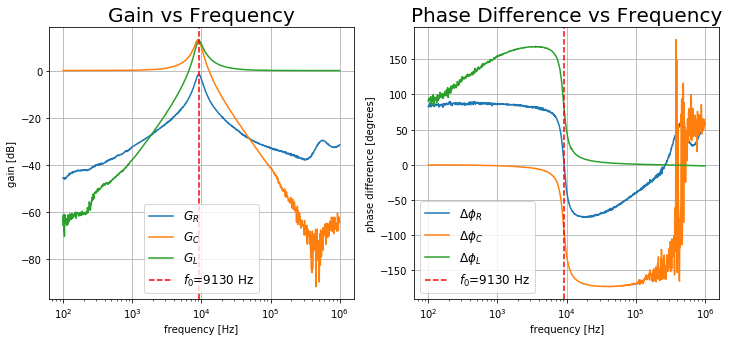

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Gain vs Frequency',fontsize=20)
plt.ylabel('gain [dB]')
plt.xlabel('frequency [Hz]')
plt.semilogx(Vr_100_freq, Vr_100_gain, '-', label='$G_R$')
plt.semilogx(Vc_100_freq, Vc_100_gain, '-', label='$G_C$')
plt.semilogx(Vl_100_freq, Vl_100_gain, '-', label='$G_L$')
plt.axvline(f_avg, ls='--', color='r', label='$f_0$=9130 Hz')
plt.legend(fontsize=12)
plt.grid()

plt.subplot(1,2,2)
plt.title('Phase Difference vs Frequency',fontsize=20)
plt.ylabel('phase difference [degrees]')
plt.xlabel('frequency [Hz]')
plt.semilogx(Vr_100_freq, Vr_100_phasediff, '-', label='$\Delta \phi_R$')
plt.semilogx(Vc_100_freq, Vc_100_phasediff, '-', label='$\Delta \phi_C$')
plt.semilogx(Vl_100_freq, Vl_100_phasediff, '-', label='$\Delta \phi_L$')
plt.axvline(f_avg, ls='--', color='r', label='$f_0$=9130 Hz')
plt.legend(fontsize=12)
plt.grid()

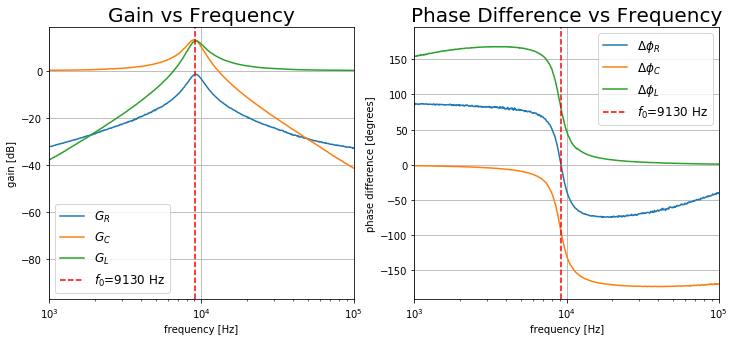

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Gain vs Frequency',fontsize=20)
plt.ylabel('gain [dB]')
plt.xlabel('frequency [Hz]')
plt.xlim([10**3, 10**5])
plt.semilogx(Vr_100_freq, Vr_100_gain, '-', label='$G_R$')
plt.semilogx(Vc_100_freq, Vc_100_gain, '-', label='$G_C$')
plt.semilogx(Vl_100_freq, Vl_100_gain, '-', label='$G_L$')
plt.axvline(f_avg, ls='--', color='r', label='$f_0$=9130 Hz')
plt.legend(fontsize=12)
plt.grid()

plt.subplot(1,2,2)
plt.title('Phase Difference vs Frequency',fontsize=20)
plt.ylabel('phase difference [degrees]')
plt.xlabel('frequency [Hz]')
plt.xlim([10**3, 10**5])
plt.semilogx(Vr_100_freq, Vr_100_phasediff, '-', label='$\Delta \phi_R$')
plt.semilogx(Vc_100_freq, Vc_100_phasediff, '-', label='$\Delta \phi_C$')
plt.semilogx(Vl_100_freq, Vl_100_phasediff, '-', label='$\Delta \phi_L$')
plt.axvline(f_avg, ls='--', color='r', label='$f_0$=9130 Hz')
plt.legend(fontsize=12)
plt.grid()

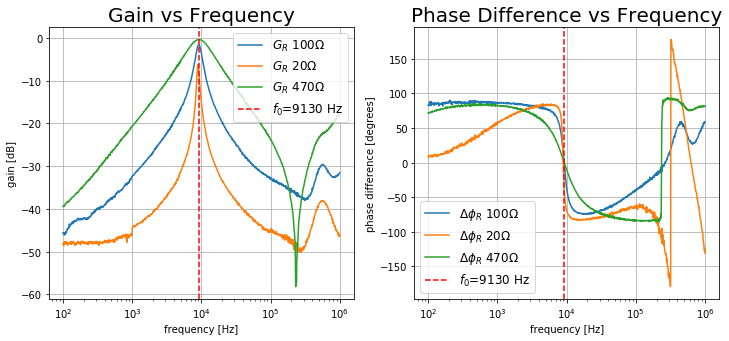

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Gain vs Frequency',fontsize=20)
plt.ylabel('gain [dB]')
plt.xlabel('frequency [Hz]')
plt.semilogx(Vr_100_freq, Vr_100_gain, '-', label='$G_R ~100 \Omega$')
plt.semilogx(Vr_20_freq, Vr_20_gain, '-', label='$G_R ~20 \Omega$')
plt.semilogx(Vr_470_freq, Vr_470_gain, '-', label='$G_R ~470 \Omega$')
plt.axvline(f_avg, ls='--', color='r', label='$f_0$=9130 Hz')
plt.legend(fontsize=12)
plt.grid()

plt.subplot(1,2,2)
plt.title('Phase Difference vs Frequency',fontsize=20)
plt.ylabel('phase difference [degrees]')
plt.xlabel('frequency [Hz]')
plt.semilogx(Vr_100_freq, Vr_100_phasediff, '-', label='$\Delta \phi_R ~100 \Omega$')
plt.semilogx(Vr_20_freq, Vr_20_phasediff, '-', label='$\Delta \phi_R ~20 \Omega$')
plt.semilogx(Vr_470_freq, Vr_470_phasediff, '-', label='$\Delta \phi_R ~470 \Omega$')
plt.axvline(f_avg, ls='--', color='r', label='$f_0$=9130 Hz')
plt.legend(fontsize=12)
plt.grid()

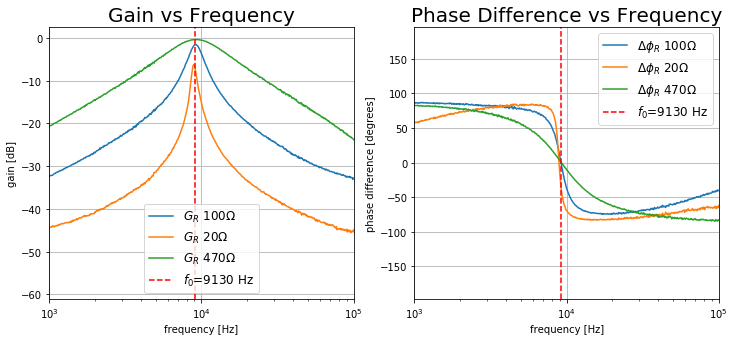

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Gain vs Frequency',fontsize=20)
plt.ylabel('gain [dB]')
plt.xlabel('frequency [Hz]')
plt.xlim([10**3, 10**5])
plt.semilogx(Vr_100_freq, Vr_100_gain, '-', label='$G_R ~100 \Omega$')
plt.semilogx(Vr_20_freq, Vr_20_gain, '-', label='$G_R ~20 \Omega$')
plt.semilogx(Vr_470_freq, Vr_470_gain, '-', label='$G_R ~470 \Omega$')
plt.axvline(f_avg, ls='--', color='r', label='$f_0$=9130 Hz')
plt.legend(fontsize=12)
plt.grid()

plt.subplot(1,2,2)
plt.title('Phase Difference vs Frequency',fontsize=20)
plt.ylabel('phase difference [degrees]')
plt.xlabel('frequency [Hz]')
plt.xlim([10**3, 10**5])
plt.semilogx(Vr_100_freq, Vr_100_phasediff, '-', label='$\Delta \phi_R ~100 \Omega$')
plt.semilogx(Vr_20_freq, Vr_20_phasediff, '-', label='$\Delta \phi_R ~20 \Omega$')
plt.semilogx(Vr_470_freq, Vr_470_phasediff, '-', label='$\Delta \phi_R ~470 \Omega$')
plt.axvline(f_avg, ls='--', color='r', label='$f_0$=9130 Hz')
plt.legend(fontsize=12)
plt.grid()